In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [12]:
# load the dataset
data = pd.read_csv("D:\\Data\iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
means = data.mean()
stds = data.std()

In [15]:
stds

sepal.length    0.828066
sepal.width     0.435866
petal.length    1.765298
petal.width     0.762238
dtype: float64

In [16]:
import numpy as np
import pandas as pd



# Calculate the mean and standard deviation of the "Glucose" column
mean_sl = np.mean(data["sepal.length"])
std_deviation_sl = np.std(data["sepal.length"])

# Calculate the standard deviation of each value in the "Pregnancies" column
standardized_values_sl = (data["sepal.length"] - mean_sl) / std_deviation_sl

# Print the standardized values
print("Standardized Values:")
print(standardized_values_sl)


Standardized Values:
0     -0.900681
1     -1.143017
2     -1.385353
3     -1.506521
4     -1.021849
         ...   
145    1.038005
146    0.553333
147    0.795669
148    0.432165
149    0.068662
Name: sepal.length, Length: 150, dtype: float64


In [17]:
import numpy as np
import pandas as pd



# Calculate the mean and standard deviation of the "bloodpressure" column
mean_pl = np.mean(data["petal.length"])
std_deviation_pl = np.std(data["petal.length"])

# Calculate the standard deviation of each value in the "bloodpressure" column
standardized_values_pl = (data["petal.length"] - mean_pl) / std_deviation_pl

# Print the standardized value
print("Standardized Values:")
print(standardized_values_pl)


Standardized Values:
0     -1.340227
1     -1.340227
2     -1.397064
3     -1.283389
4     -1.340227
         ...   
145    0.819596
146    0.705921
147    0.819596
148    0.933271
149    0.762758
Name: petal.length, Length: 150, dtype: float64


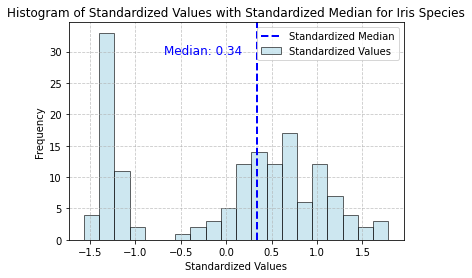

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Create a histogram for the standardized values

median_pl = np.median(data["petal.length"])
standardized_median_pl = (median_pl - mean_pl) / std_deviation_pl

plt.hist(standardized_values_pl, bins=20, alpha=0.6, color='lightblue', label='Standardized Values', edgecolor='black')

# Add a vertical line to represent the standardized median in red
plt.axvline(standardized_median_pl, color='blue', linestyle='dashed', linewidth=2, label='Standardized Median')

# Set labels and title
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Values with Standardized Median for Iris Species')

# Add a legend
plt.legend()
plt.text(plt.xlim()[0] + 1.05, plt.ylim()[1] * 0.9, f'Median: {standardized_median_pl:.2f}', color='blue', ha='left', va='top', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [20]:
left_mask = standardized_values_pl <= standardized_median_pl
left_selected_values = data["petal.length"][left_mask]

right_mask = standardized_values_pl > standardized_median_pl
right_selected_values = data["petal.length"][right_mask]

print("Left Selected Values:")
print(left_selected_values)
print("Right Selected Values:")
print(right_selected_values)


Left Selected Values:
0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
     ... 
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal.length, Length: 75, dtype: float64
Right Selected Values:
50     4.7
51     4.5
52     4.9
54     4.6
55     4.5
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, Length: 75, dtype: float64


In [21]:

# Calculate the absolute difference between each value and the median
left_diff = np.abs(left_selected_values - median_pl)
right_diff = np.abs(right_selected_values - median_pl)

# Sort the values based on the absolute difference
left_sorted = left_selected_values.reset_index(drop=True)[np.argsort(left_diff)]
right_sorted = right_selected_values.reset_index(drop=True)[np.argsort(right_diff)]


# Calculate the number of values to select from each side
num_values = len(left_selected_values)

# Take the closest 75% of the left and right side values
left_75_percent = left_sorted[:int(0.85 * num_values)]
right_75_percent = right_sorted[:int(0.85 * num_values)]

# Print the 75% of the left and right side values that are closest to the median
print("Left 85%:")
print(left_75_percent)
print("Right 85%:")
print(right_75_percent)
print(len(right_75_percent))
print(len(left_75_percent))

selected_left_rows = data.loc[left_75_percent.index]
selected_right_rows = data.loc[right_75_percent.index]

# Print the selected rows
print("Selected Left Rows:")
print(selected_left_rows)
print("Selected Right Rows:")
print(selected_right_rows)

Left 75%:
72    4.3
60    4.3
71    4.2
54    4.2
70    4.2
     ... 
49    1.4
28    1.4
17    1.4
45    1.4
33    1.4
Name: petal.length, Length: 63, dtype: float64
Right 75%:
14    4.4
23    4.4
8     4.4
22    4.4
1     4.5
     ... 
49    5.7
33    5.8
54    5.8
29    5.8
27    5.9
Name: petal.length, Length: 63, dtype: float64
63
63
Selected Left Rows:
    sepal.length  sepal.width  petal.length  petal.width     variety
72           6.3          2.5           4.9          1.5  Versicolor
60           5.0          2.0           3.5          1.0  Versicolor
71           6.1          2.8           4.0          1.3  Versicolor
54           6.5          2.8           4.6          1.5  Versicolor
70           5.9          3.2           4.8          1.8  Versicolor
..           ...          ...           ...          ...         ...
49           5.0          3.3           1.4          0.2      Setosa
28           5.2          3.4           1.4          0.2      Setosa
17           5.1  

In [22]:
combined_dataset = pd.concat([selected_left_rows, selected_right_rows], axis=0)

# Print the combined dataset
print("Combined Dataset:")
print(combined_dataset)

Combined Dataset:
    sepal.length  sepal.width  petal.length  petal.width     variety
72           6.3          2.5           4.9          1.5  Versicolor
60           5.0          2.0           3.5          1.0  Versicolor
71           6.1          2.8           4.0          1.3  Versicolor
54           6.5          2.8           4.6          1.5  Versicolor
70           5.9          3.2           4.8          1.8  Versicolor
..           ...          ...           ...          ...         ...
49           5.0          3.3           1.4          0.2      Setosa
33           5.5          4.2           1.4          0.2      Setosa
54           6.5          2.8           4.6          1.5  Versicolor
29           4.7          3.2           1.6          0.2      Setosa
27           5.2          3.5           1.5          0.2      Setosa

[126 rows x 5 columns]


In [23]:
combined_dataset_without_variety = combined_dataset.drop(columns=["variety"])

# Print the modified dataset
print("Combined Dataset without 'variety' column:")
print(combined_dataset_without_variety)

Combined Dataset without 'variety' column:
    sepal.length  sepal.width  petal.length  petal.width
72           6.3          2.5           4.9          1.5
60           5.0          2.0           3.5          1.0
71           6.1          2.8           4.0          1.3
54           6.5          2.8           4.6          1.5
70           5.9          3.2           4.8          1.8
..           ...          ...           ...          ...
49           5.0          3.3           1.4          0.2
33           5.5          4.2           1.4          0.2
54           6.5          2.8           4.6          1.5
29           4.7          3.2           1.6          0.2
27           5.2          3.5           1.5          0.2

[126 rows x 4 columns]


In [24]:
combined_dataset_without_variety=combined_dataset_without_variety.drop(columns=["sepal.width"])


In [25]:
print(combined_dataset_without_variety)

    sepal.length  petal.length  petal.width
72           6.3           4.9          1.5
60           5.0           3.5          1.0
71           6.1           4.0          1.3
54           6.5           4.6          1.5
70           5.9           4.8          1.8
..           ...           ...          ...
49           5.0           1.4          0.2
33           5.5           1.4          0.2
54           6.5           4.6          1.5
29           4.7           1.6          0.2
27           5.2           1.5          0.2

[126 rows x 3 columns]


In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming combined_dataset_without_variety is your dataset without the "variety" column

# Number of clusters (you can adjust this)
k = 3

# Initialize K-means with k clusters
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit K-means to the data
kmeans.fit(combined_dataset_without_variety)

# Predict cluster labels for each data point
clusters = kmeans.predict(combined_dataset_without_variety)

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(combined_dataset_without_variety, clusters)

# Print the silhouette score and cluster labels
print("Silhouette Score for {} clusters: {:.2f}".format(k, silhouette_avg))
print("Cluster Labels:", clusters)


Silhouette Score for 3 clusters: 0.70
Cluster Labels: [2 1 1 2 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 2 1 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 1 0 0 1 1 0 2 2 0 0 0 2 2 0 0 1 2 1
 0 0 1 2 1 1 0 1 1 0 0 0 2 0 0]


In [27]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

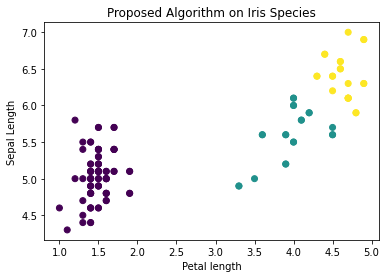

In [28]:
# Access columns by their names
feature1 = combined_dataset_without_variety['petal.length']
feature2 = combined_dataset_without_variety['sepal.length']

# Create a scatter plot
plt.scatter(feature1, feature2, c=clusters, cmap='viridis')
plt.title('Proposed Algorithm on Iris Species')
plt.xlabel('Petal length')
plt.ylabel('Sepal Length')
plt.show()

# Create a scatter plot

In [29]:
# IRIS KMEANS

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [34]:
# load the dataset
data = pd.read_csv("D:\\Data\iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [35]:
data = data.drop(columns=["variety"])

In [36]:
data

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'data' is your dataset without the "variety" column

# Number of clusters (you can adjust this)
k = 3

# Initialize K-means with k clusters
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit K-means to the data
kmeans.fit(data)

# Predict cluster labels for each data point
clusters = kmeans.predict(data)

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(data, clusters)

# Threshold for outlier removal (you can adjust this)
threshold = 0.9

# Identify and remove outliers based on the threshold
outliers = np.where(np.min(kmeans.transform(data), axis=1) > threshold)[0]
data_without_outliers = data.drop(index=outliers)

# Calculate the silhouette score after removing outliers
kmeans.fit(data_without_outliers)
clusters_without_outliers = kmeans.predict(data_without_outliers)
silhouette_avg_no_outliers = silhouette_score(data_without_outliers, clusters_without_outliers)

# Print the silhouette score before and after removing outliers
print("Silhouette Score (before removing outliers): {:.2f}".format(silhouette_avg))
print("Silhouette Score (after removing outliers): {:.2f}".format(silhouette_avg_no_outliers))

# Print the number of rows after removing outliers
num_rows_without_outliers = len(data_without_outliers)
print("Number of rows after removing outliers:", num_rows_without_outliers)


Silhouette Score (before removing outliers): 0.55
Silhouette Score (after removing outliers): 0.60
Number of rows after removing outliers: 126
